In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


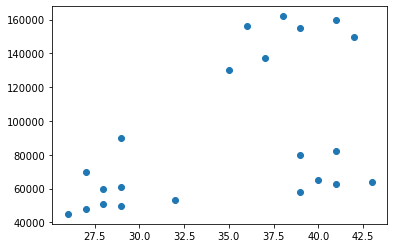

In [4]:
plt.scatter(df["Age"],df["Income($)"])

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3)

In [7]:
result = model.fit_predict(df[["Age","Income($)"]])

In [8]:
df["cluster"]= result

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [10]:
df0 = df[df["cluster"] ==0]
df1= df[df["cluster"] ==1]
df2 = df[df["cluster"] ==2]

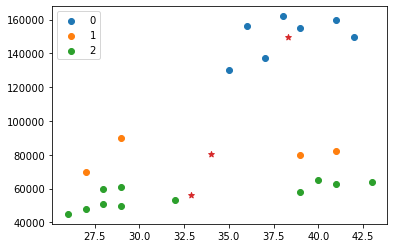

In [11]:
plt.scatter(df0["Age"],df0["Income($)"],label="0")
plt.scatter(df1["Age"],df1["Income($)"],label="1")
plt.scatter(df2["Age"],df2["Income($)"],label="2")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*")
plt.legend()

In [12]:
model.cluster_centers_[:,0]

array([38.28571429, 34.        , 32.90909091])

In [13]:
model.cluster_centers_[:,1]

array([150000.        ,  80500.        ,  56136.36363636])

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
label = MinMaxScaler()

label.fit(df[["Age"]])
df["Age"]=label.transform(df[["Age"]])
label.fit(df[["Income($)"]])
df["Income($)"]=label.transform(df[["Income($)"]])

In [16]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


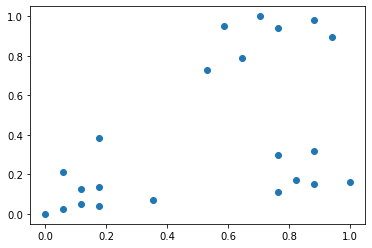

In [17]:
plt.scatter(df["Age"],df["Income($)"])

In [18]:
model1 = KMeans(n_clusters=3)
result = model1.fit_predict(df[["Age","Income($)"]])

In [20]:
result

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [21]:
df["cluster2"]= result

In [22]:
df.head()

,Name,Age,Income($),cluster,cluster2
0,Rob,0.058824,0.213675,1,2
1,Michael,0.176471,0.384615,1,2
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,0,0


In [23]:
df0 = df[df["cluster2"] ==0]
df1= df[df["cluster2"] ==1]
df2 = df[df["cluster2"] ==2]

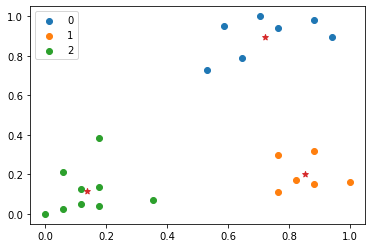

In [24]:
plt.scatter(df0["Age"],df0["Income($)"],label="0")
plt.scatter(df1["Age"],df1["Income($)"],label="1")
plt.scatter(df2["Age"],df2["Income($)"],label="2")
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],marker="*")
plt.legend()

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    
    
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

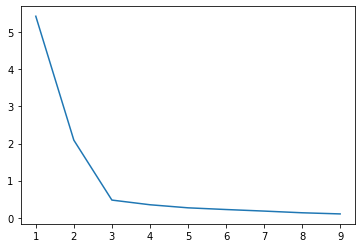

In [27]:
plt.plot(k_rng,sse)